## Deviations from normality


Gaussian assumption: asset returns are normally distributed.

Unfortunately, real stocks do not give normally distributed returns. Normal distribution underestimates extremal returns. In order to study better the return distribution, we must use the **skewness** and **kurtosis**. Skewness is just a measure of the symmetry of a distribution, while kurtosis measures the thickness of the tails of the distributions. Skewness can be studied with Fisher asymmetry coefficient S

$$ S(R) = \frac{E[(R-E(R))^{3}]}{[Var(R)]^{\frac{3}{2}}} $$

where $R$ is the return. If the distribution is symmetric, S = 0. However, the opposite is NOT the same, as we can have an asymmetric distribution with S = 0.

Kurtosis can be studied with the following coefficient:

$$ K(R) = \frac{E[(R-E(R))^{4}]}{[Var(R)]^{\frac{4}{2}}} $$

For the Gaussian distribution, K = 3. From this, we can define the following:

  - K>3, leptokurtic: thin peak, low dispersion
  - K<3, platikurtic: fat peak, high disperion
  - K = 3, mesokurtic : normal distribution

## Jarque-Bera test

There are many tests that tell if a distribution is normal and perhaps one of the most commonly
used is called the Jarque-Bera test. the Jarque–Bera test is a goodness-of-fit test of whether sample data have the skewness and kurtosis matching a normal distribution. he test statistic is always nonnegative. If it is far from zero, it signals the data do not have a normal distribution:

$$ JB = \frac{N}{6}(S^{2} + \frac{(K-3)^{2}}{4}) $$

## Deviations from normality (lab part)

In [1]:
%load_ext autoreload
%autoreload 2   

#this little piece of code above updates/reload the modules we are using instantly before running the code.


In [1]:
import edhec_risk_kit as erk 

hfi = erk.get_hfi_returns()

In [2]:
hfi.head()

,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
1997-01,0.0119,0.0393,0.0178,0.0791,0.0189,0.0213,0.0191,0.0573,0.0281,0.0150,0.0180,-0.0166,0.0317
1997-02,0.0123,0.0298,0.0122,0.0525,0.0101,0.0084,0.0122,0.0175,-0.0006,0.0034,0.0118,0.0426,0.0106
1997-03,0.0078,-0.0021,-0.0012,-0.0120,0.0016,-0.0023,0.0109,-0.0119,-0.0084,0.0060,0.0010,0.0778,-0.0077
1997-04,0.0086,-0.0170,0.0030,0.0119,0.0119,-0.0005,0.0130,0.0172,0.0084,-0.0001,0.0122,-0.0129,0.0009
1997-05,0.0156,-0.0015,0.0233,0.0315,0.0189,0.0346,0.0118,0.0108,0.0394,0.0197,0.0173,-0.0737,0.0275


We will now calculate the means and medians, and see if the mean is higher than the median. If the mean is higher than the median, this means that the distribution is in general positively skewed.

In [4]:
import pandas as pd

mean_med = pd.concat([hfi.mean(),hfi.median(), hfi.mean()>hfi.median()],axis="columns")

As we will see now, most distribution are _negatively skewed_ (false means negatively skewed):

In [5]:
(mean_med.groupby(2).size()/mean_med.count()).dropna() #for some reason, a NaN appears

False    0.769231
True     0.230769
dtype: float64

Let's actually calculate the skewness with the function we created in our module:

In [6]:
erk.skewness(hfi)


Convertible Arbitrage    -2.639592
CTA Global                0.173699
Distressed Securities    -1.300842
Emerging Markets         -1.167067
Equity Market Neutral    -2.124435
Event Driven             -1.409154
Fixed Income Arbitrage   -3.940320
Global Macro              0.982922
Long/Short Equity        -0.390227
Merger Arbitrage         -1.320083
Relative Value           -1.815470
Short Selling             0.767975
Funds Of Funds           -0.361783
dtype: float64

If we do it with scipy:

In [7]:
import scipy.stats
scipy.stats.skew(hfi)

array([-2.63959223,  0.17369864, -1.30084204, -1.16706749, -2.12443538,
       -1.40915356, -3.94032029,  0.98292188, -0.39022677, -1.32008333,
       -1.81546975,  0.76797484, -0.36178308])

And we obtain the same.

Let's now check the kurtosis:

In [8]:
erk.kurtosis(hfi)

Convertible Arbitrage     23.280834
CTA Global                 2.952960
Distressed Securities      7.889983
Emerging Markets           9.250788
Equity Market Neutral     17.218555
Event Driven               8.035828
Fixed Income Arbitrage    29.842199
Global Macro               5.741679
Long/Short Equity          4.523893
Merger Arbitrage           8.738950
Relative Value            12.121208
Short Selling              6.117772
Funds Of Funds             7.070153
dtype: float64

And of course, the results you see are nothing similar to what you would expect fom a normal distribution (kurtosis=3). Most of these distribution are tremendously leptokurtic, which means that there are certain returns that are very common.

**If you calculate scipy.stats.kurtosis, remember that this function gives the excess curtosis**

Let's plot Convertible Arbitrage and CTA Global for fun. The first is negatively skewed and tremendously leptokurtic, while the second one has almost zero skewness and mesotikurtic (that is, almost normal. Remember, however, that zero skewness does not always mean symmetry, but in this case it more or less does).

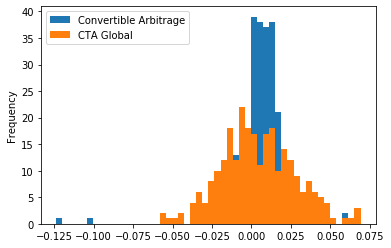

In [9]:
hfi[['Convertible Arbitrage','CTA Global']].plot.hist(bins=50)

The difference is clear. Let's now apply the Jarque-Bera equation.

The function we will use to do so is scipy.stats.jarque_bera() gives two numbers, the actual value that the equations provides (first) and the p-value (second), which in this case, tells us how confident we are about the distribution being normal. In general, if the p-value is above 0.01 or 0.05 (depends on your taste), we could accept the hypothesis that the data might follow a normal distribution. The higher the p-value, the more confident we could be about the data following a normal distribution.

Bear in mind that this function does not return values for each column, but for all the Series or DataFrame as a whole, so we have to add some lines for it to return p values for each column/asset. Along with this, we have built a function that tells as if each asset passes the hypothesis that it might follow a normal distribution. All of this is merged into another function to give all the data in a nice DataFrame.

In [10]:
jb_p_normal = erk.jb_pvalue_normal(hfi)
jb_p_normal

,JB,p_value,Normal
0,4812.703130,0.000000e+00,False
1,1.346753,5.099837e-01,True
2,336.209308,0.000000e+00,False
3,487.870938,0.000000e+00,False
4,2413.246539,0.000000e+00,False
5,364.939023,0.000000e+00,False
6,8576.081066,0.000000e+00,False
7,124.720604,0.000000e+00,False
8,32.122780,1.058344e-07,False
9,437.303521,0.000000e+00,False


And in case you want to know the percentage of assets that pass the normality hypothesis:

In [11]:
jb_p_normal.groupby(["Normal"]).size()/jb_p_normal["Normal"].count() #for some reason, a NaN appears



Normal
False    0.923077
True     0.076923
dtype: float64